<a href="https://colab.research.google.com/github/smathews88/machine_learning/blob/main/05_ml_naive_bayes_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Classification**

---



# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Dataset**

In [3]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups()
df = pd.DataFrame(news.data, columns=['text'])
df['target'] = news.target
df.head()


,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


# **Data preprocessing**

In [4]:
df['text'] = df['text'].str.lower()
df.head()

,text,target
0,from: lerxst@wam.umd.edu (where's my thing)\ns...,7
1,from: guykuo@carson.u.washington.edu (guy kuo)...,4
2,from: twillis@ec.ecn.purdue.edu (thomas e will...,4
3,from: jgreen@amber (joe green)\nsubject: re: w...,1
4,from: jcm@head-cfa.harvard.edu (jonathan mcdow...,14


In [5]:
df['text'] = df['text'].str.replace(r"http\S+", "", regex=True)
df.head()

,text,target
0,from: lerxst@wam.umd.edu (where's my thing)\ns...,7
1,from: guykuo@carson.u.washington.edu (guy kuo)...,4
2,from: twillis@ec.ecn.purdue.edu (thomas e will...,4
3,from: jgreen@amber (joe green)\nsubject: re: w...,1
4,from: jcm@head-cfa.harvard.edu (jonathan mcdow...,14


In [6]:
df['text'] = df['text'].str.replace('[^A-Za-z0-9]+',' ', regex=True)
df.head()

,text,target
0,from lerxst wam umd edu where s my thing subje...,7
1,from guykuo carson u washington edu guy kuo su...,4
2,from twillis ec ecn purdue edu thomas e willis...,4
3,from jgreen amber joe green subject re weitek ...,1
4,from jcm head cfa harvard edu jonathan mcdowel...,14


In [7]:
import nltk
from nltk.corpus import stopwords
## NLTK library provides the set of stop words for English
nltk.download('stopwords')
stopwords = stopwords.words('english')
df['text'] = df['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  target
0  lerxst wam umd edu thing subject car nntp post...       7
1  guykuo carson u washington edu guy kuo subject...       4
2  twillis ec ecn purdue edu thomas e willis subj...       4
3  jgreen amber joe green subject weitek p9000 or...       1
4  jcm head cfa harvard edu jonathan mcdowell sub...      14


In [8]:
df['target_names'] = df['target'].apply(lambda x: news.target_names[x])
import re
df['text'] = df['text'].apply(lambda x: re.sub('\s*\\b([a-z]|[a-z]{2})\\b', '', x))
pattern = r'[0-9]'
df['text'] = df['text'].apply(lambda x: re.sub('[0-9]', '', x))
df.head()

,text,target,target_names
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware
3,jgreen amber joe green subject weitek p organi...,1,comp.graphics
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space


# **Exploratory Data Analysis**

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt'],
      dtype=object)

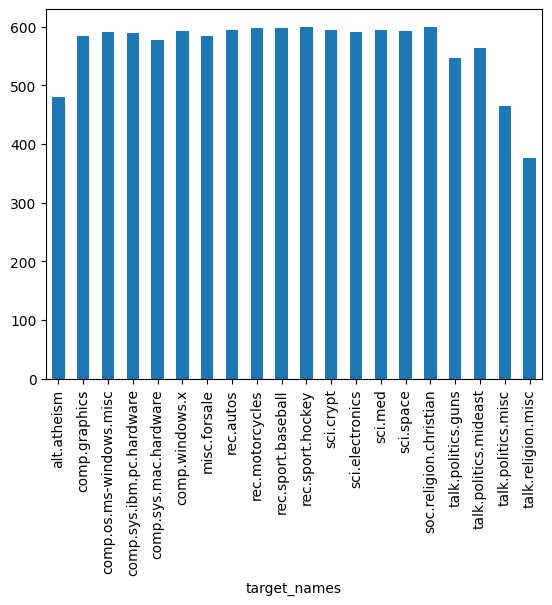

In [9]:
df['target_names'].groupby(df['target_names']).count().plot.bar()
df['target_names'].unique()

In [10]:
df['word_length'] = df['text'].str.split().str.len()
df.head()

,text,target,target_names,word_length
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos,69
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware,91
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware,170
3,jgreen amber joe green subject weitek p organi...,1,comp.graphics,90
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space,107


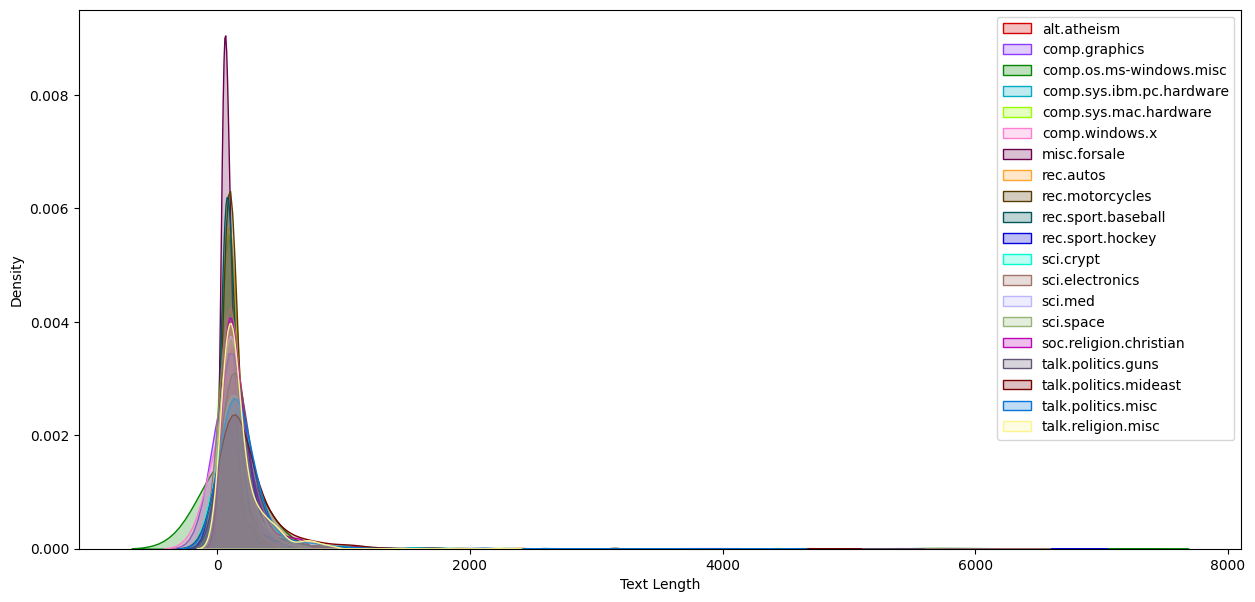

In [11]:
import colorcet as cc
plt.figure(figsize=(15,7))
palette = sns.color_palette(cc.glasbey, n_colors=20)
labels = news.target_names
for label,clr in zip(labels,palette):
    sns.kdeplot(df.loc[(df['target_names']==label), 'word_length'], color=clr, fill='solid', label=label)
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.legend()

# **Lemmatization**

In [12]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = nltk.stem.WordNetLemmatizer()
df['text'] = df['text'].apply(lambda words: ' '.join(lemmatizer.lemmatize(word) for word in words.split()))
print(df['text'][0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park line wondering anyone could enlighten car saw day door sport car looked late s early s called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please mail thanks brought neighborhood lerxst


In [13]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# **Tokenization**

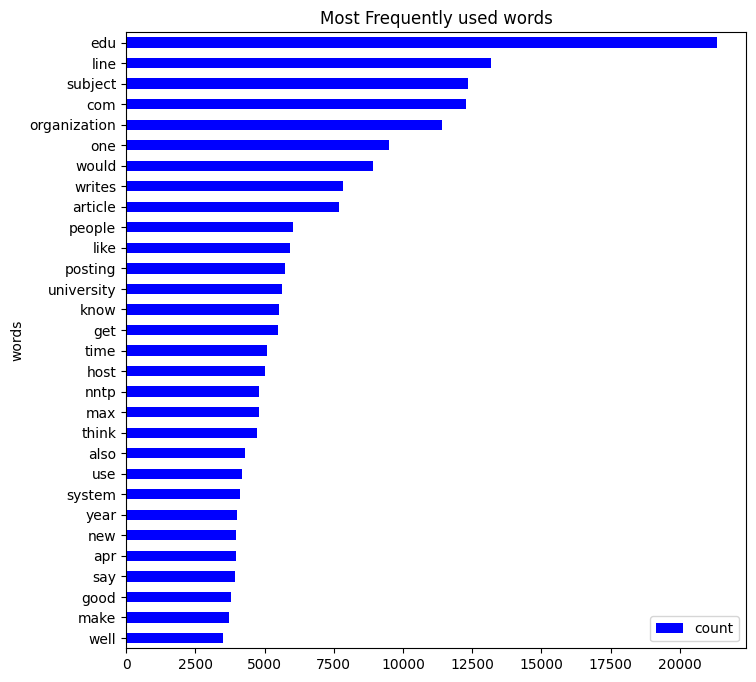

In [14]:
import itertools
import collections
import pandas as pd
import matplotlib.pyplot as plt
lemmatized_tokens = list(map(w_tokenizer.tokenize, df['text']))
token_list = list(itertools.chain(*lemmatized_tokens))
vocab = set(token_list)
counts_no = collections.Counter(token_list)
clean_text = pd.DataFrame(counts_no.most_common(30),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_text.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Most Frequently used words")
plt.show()

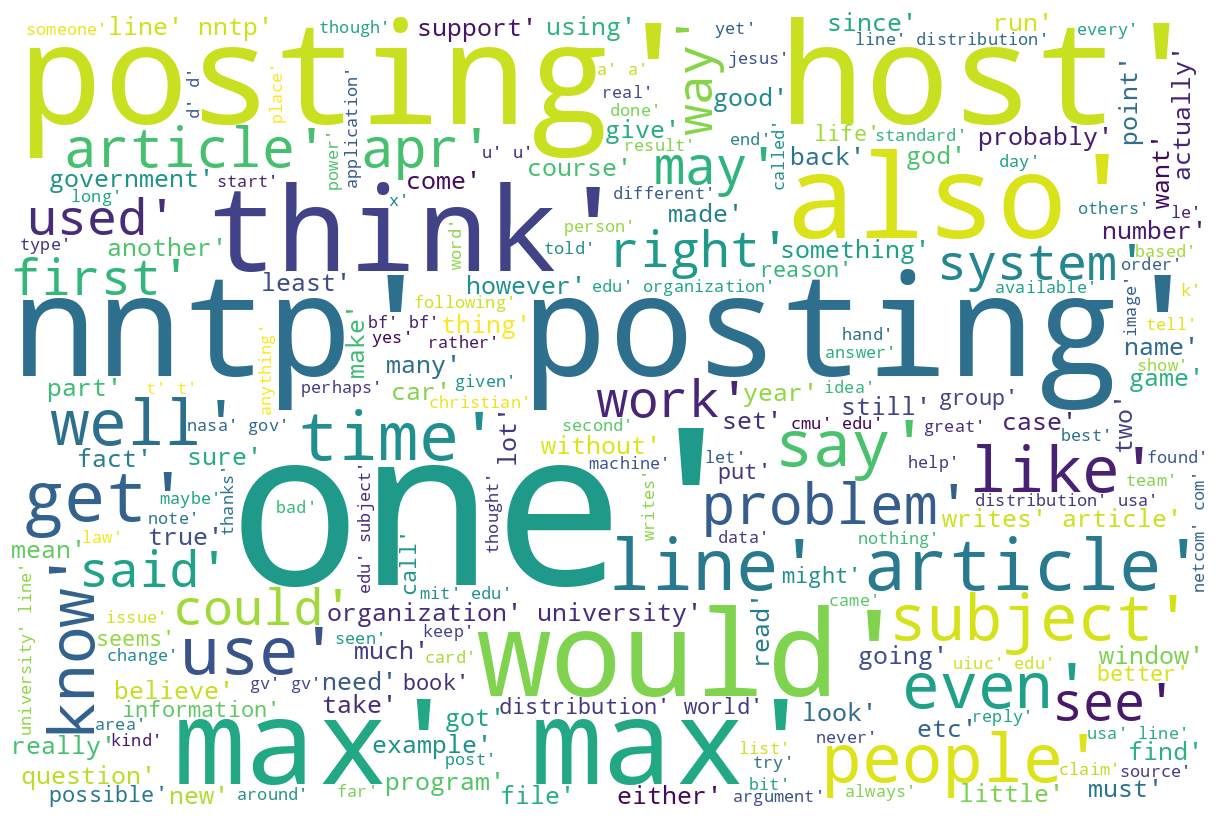

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(str(token_list))

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **Create Testing and Training Dataset**

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)
X = pd.DataFrame(X_test)
X

,text
7492,rrn cwru edu robert novitskey subject cyclone ...
3546,ardie ux cso uiuc edu ardie mack subject do de...
5582,tsa cellar org silent assassin subject sale mi...
4793,guy idacom com guy trotter subject gun backcou...
3813,jwodzia fadel uucp john wodziak subject goalie...
...,...
7930,cgordon vpnet chi gordon hlavenka subject save...
715,aa freenet carleton mark baker subject arrogan...
10940,gary kezv uucp gary coffman subject ussr reach...
8422,ron hpfcso com ron miller subject boston gun b...


# **Vectorize the pre-processed text**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=vocab)

# **Build and Train Model**

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
pipe = Pipeline([("vectorizer", vectorizer), ("classifier", classifier)])
pipe.fit(X_train, y_train)
#classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(vocabulary={'a', 'aa', 'aaa', 'aaaa',
                                             'aaaaaaaaaaaa',
                                             'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
                                             'aaaaagggghhhh', 'aaaarrgghhhh',
                                             'aaah', 'aaahh', 'aaahhhh', 'aaai',
                                             'aab', 'aac', 'aacc', 'aachen',
                                             'aacvkc', 'aad', 'aadce', 'aae',
                                             'aaefu', 'aaf', 'aafc',
                                             'aafdcbedcbceb', 'aah', 'aai',
                                             'aaj', 'aak', 'aalac', 'aalborg', ...})),
                ('classifier', MultinomialNB())])

# **Model Evaluation**

In [47]:
y_pred = pipe.predict(X_test)
X["predicted"] = y_pred
X["predicted_names"] = X['predicted'].apply(lambda x: news.target_names[x])
X["actual_names"] = y_test.apply(lambda x: news.target_names[x])
X

,text,predicted,predicted_names,actual_names
7492,rrn cwru edu robert novitskey subject cyclone ...,3,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware
3546,ardie ux cso uiuc edu ardie mack subject do de...,3,comp.sys.ibm.pc.hardware,comp.os.ms-windows.misc
5582,tsa cellar org silent assassin subject sale mi...,6,misc.forsale,misc.forsale
4793,guy idacom com guy trotter subject gun backcou...,16,talk.politics.guns,talk.politics.guns
3813,jwodzia fadel uucp john wodziak subject goalie...,10,rec.sport.hockey,rec.sport.hockey
...,...,...,...,...
7930,cgordon vpnet chi gordon hlavenka subject save...,5,comp.windows.x,comp.os.ms-windows.misc
715,aa freenet carleton mark baker subject arrogan...,15,soc.religion.christian,soc.religion.christian
10940,gary kezv uucp gary coffman subject ussr reach...,14,sci.space,sci.space
8422,ron hpfcso com ron miller subject boston gun b...,16,talk.politics.guns,talk.politics.guns


In [48]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8749447635881573


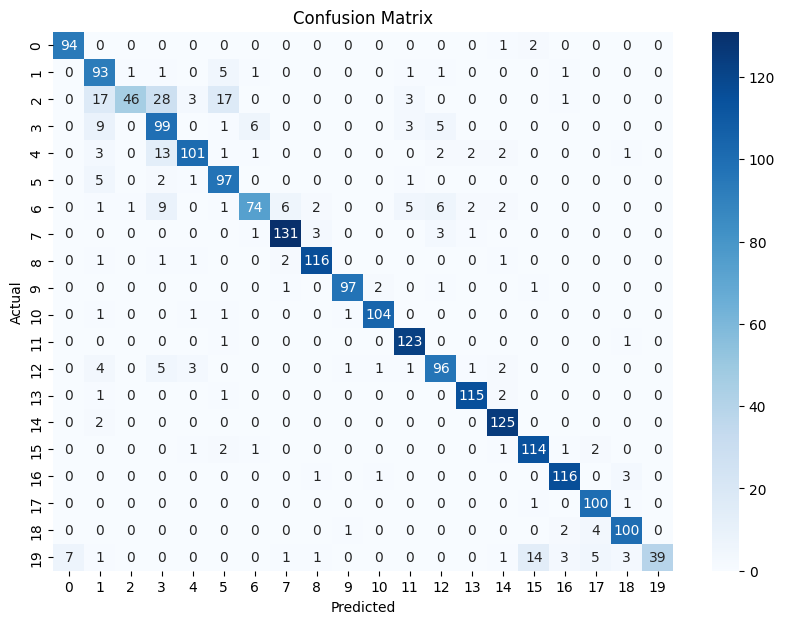

In [49]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [60]:
news.target_names[pipe.predict(["God is love"])[0]]

'soc.religion.christian'